## Examples on how to screen for similar molecules in Enamine REAL space

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from IPython.core.display import HTML

<IPython.core.display.Javascript object>

### Requirements:
* [Ftree](https://www.biosolveit.de/FTrees/) tool from BioSolveIt
* [REAL space](https://www.biosolveit.de/CoLibri/spaces.html#realspace) to  find synthesizable compounds from Enamine

Ftrees commandline help:

 Available options:

 Program options:
  -i [ --input ] arg                   Input query molecule file or single input molecule as smiles.
  -s [ --searchFiles ] arg             Paths to library input molecule files for similarity scoring or to
                                       Fragment Space FSF files or Fragment Spaces.
                                       Note: The .flf and fragment files specified in the FSF have to be in
                                       the appropriate relative paths.
  -o [ --outputFiles ] arg             Output base files (suffixes are required). Only '.sdf' and '.csv' are
                                       supported.
  -m [ --matchImageBaseFile ] arg      Output base file name for matching images (suffix required).
                                       The file formats '.pdf', '.png' and '.svg' are supported.
                                       Note: For each match a separate file is created.
  --gen2dOutput arg (=0)               Generates 2d coordinates in case of SDF output files.
                                       Note: Can't be used together with '--gen3dOutput'.
  --gen3dOutput arg (=0)               Generates 3d coordinates in case of SDF output files.
                                       Note: Can't be used together with '--gen2dOutput'.
  --thread-count arg                   Maximum number of threads used for calculations.

 Configuration:
  --comparisonAlgorithm arg (=1)       Feature Tree comparison algorithm
                                           0: Split-Search
                                           1: Match-Search
                                           2: Multi-Match-Search
  --expandAlternativeResults arg (=0)  Write alternative results based on alternative reaction paths or
                                       duplicate matchings.
  --maxNofResults arg (=100)           Maximum number of top-ranking result molecules [1 to 1000000].
  --minSimilarityThreshold arg (=0.8)  Similarity threshold below which molecules are discarded [0.0 to 1.0].
  --targetSimilarity arg (=1)          Desired target similarity to the query molecule [0.5 to 1.0].
                                       Note: Must be >= '--minSimilarityThreshold'
  --totalDiversity arg (=1)            Required diversity between any two compounds in a solution set [0.9 to
                                       1.0].
                                       Note: Only available if --maxNofResults' is <= 500.
                                       WARNING: any value below 1.0 drastically extends the run time.

 Deprecated options:
  -l [ --library ] arg                 Library input molecule files to calculate similarity score with.
                                       Note: Can't be used together with '--searchFiles'.
  -f [ --fragSpace ] arg               Paths to the Fragment Space FSF files or Fragment Spaces.
                                       Note: The .flf and fragment files specified in the FSF have to be in
                                       the appropriate relative paths.
                                       Note: Can't be used together with '--searchFiles'.

 General options:
  -h [ --help ]                        Prints this help message
  --version                            Prints version info
  --license-info                       Prints license info
  -v [ --verbosity ] arg (=2)          Set verbosity level
                                            0 [silent]
                                            1 [error]
                                            2 [warning]
                                            3 [workflow]
                                            4 [steps]


### Define input path for binary and library

Define constant that points to the data/ folder using absolute path in running computer (working dir indepedent).

In [3]:
DATADIR = Path(_dh[0]).parent.parent / "data"
print(DATADIR)

C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data


<IPython.core.display.Javascript object>

In [4]:
# FTrees executable
path_to_binary = (
    r"C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe"
)
# fragment space
fspace = "REALspace_2019-12.space"
library = DATADIR / f"{fspace}"

<IPython.core.display.Javascript object>

### Set command line options

In [5]:
# Maximum number of top-ranking result molecules [1 to 1000000].
max_nof_results = 50
# Similarity threshold below which molecules are discarded [0.0 to 1.0].
min_sim_thresh = 0.8
# Desired target similarity to the query molecule [0.5 to 1.0]. Note: Must be >= '--minSimilarityThreshold'
target_sim = 1
# Required diversity between any two compounds in a solution set [0.9 to 1.0].
total_div = 0.95
# Generates 3d coordinates in case of SDF output files. 0 = off
gen_3d_output = 1

<IPython.core.display.Javascript object>

### Example 1: Run for individual Smiles

In [6]:
smi = "CC(=O)NCCC1=CNC2=C1C=C(C=C2)OC"
# Output base files (suffixes are required). Only '.sdf' and '.csv' are supported.
outfile_name = "ex1_out"

<IPython.core.display.Javascript object>

### Prepare system call

In [7]:
sys_call = (
    path_to_binary
    + " --input "
    + smi
    + " --searchFiles "
    + str(library)
    + " --maxNofResults "
    + str(max_nof_results)
    + " --outputFiles "
    + str(DATADIR / f"{outfile_name}.sdf")
    + " --minSimilarityThreshold "
    + str(min_sim_thresh)
    + " --targetSimilarity "
    + str(target_sim)
    + " --totalDiversity "
    + str(total_div)
    + " --gen3dOutput "
    + str(gen_3d_output)
)

<IPython.core.display.Javascript object>

In [8]:
print(sys_call)

C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe --input CC(=O)NCCC1=CNC2=C1C=C(C=C2)OC --searchFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\REALspace_2019-12.space --maxNofResults 50 --outputFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\ex1_out.sdf --minSimilarityThreshold 0.8 --targetSimilarity 1 --totalDiversity 0.95 --gen3dOutput 1


<IPython.core.display.Javascript object>

In [9]:
# run
os.system(sys_call)

0

<IPython.core.display.Javascript object>

### Collect results 

In [10]:
load_file = str(DATADIR / f"{outfile_name}_1.sdf")
df = PandasTools.LoadSDF(load_file)
df.head()
# display(HTML(df.to_html()))

,result-rank,similarity,query-name,query-smiles,source,similarity-descriptor,similarity-descriptor-smiles,reaction-name,reagent1-name,reagent1-smiles,reagent2-name,reagent2-smiles,ID,ROMol
0,1,1.000,,O=C(NCCC=1c2c(NC1)ccc(OC)c2)C,REALspace_2019-12,1.000;1.000;1.000;1.000;1.000;1.000;1.000;1.00...,C1=CNcc1;c1ccccc1;O=C;N;C;C;O;C;C;,s_22,13025516,[R1*]NCCC=1c2c(OC)cccc2NC1,58844,[R1*]C(=O)C,s_22____13025516____58844,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
1,2,0.950,,O=C(NCCC=1c2c(NC1)ccc(OC)c2)C,REALspace_2019-12,1.000;1.000;0.840;1.000;1.000;1.000;1.000;1.00...,C1=CNcc1;c1ccccc1;O=C;N;C;C;O;C;O=C;N.O.C,s_2708,15506640,[R1*]C(=O)NCCC=1c2c(NC1)c(OC)ccc2,8988634,[R1*]NOC,s_2708____15506640____8988634,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,3,0.950,,O=C(NCCC=1c2c(NC1)ccc(OC)c2)C,REALspace_2019-12,1.000;0.980;0.936;1.000;0.969;0.969;0.0;0.0;0....,c1C=CNc1;Fc1ccccc1;C(=O)C;N;CC;CC;;;CC;C,s_22,13913040,[R1*]NC(CC=1c2c(NC1)ccc(F)c2)C,9296322,[R1*]C(=O)C#CC,s_22____13913040____9296322,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3,4,0.949,,O=C(NCCC=1c2c(NC1)ccc(OC)c2)C,REALspace_2019-12,1.000;1.000;0.914;1.000;1.000;1.000;1.000;0.95...,C1=CNcc1;c1ccccc1;O=CC;N;C;C;O;C;C;C.C.C.C,s_22,13771018,[R1*]NCCC=1c2c(NC1)ccc(OCCC)c2,13206548,[R1*]C(=O)C(=C)CC,s_22____13771018____13206548,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,5,0.949,,O=C(NCCC=1c2c(NC1)ccc(OC)c2)C,REALspace_2019-12,0.998;0.958;0.887;1.000;1.000;1.000;0.958;0.0;...,C1=CNcc1;c1cccnc1;O=CC;N;C;C;c1cccnc1;;C;[NH3+],s_240690b,17036658,[R1*]NCCC=1c2c(nccc2)NC1,3025692,[R1*]C(=O)C(N)C,s_240690b____17036658____3025692,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


<IPython.core.display.Javascript object>

### Example 2: Run for protease set

In [11]:
# get protease sdf file
protease_sdf = str(
    DATADIR / "proteaseFDAdrugs_3D.sdf"
)  
# Output base files (suffixes are required). Only '.sdf' and '.csv' are supported.
outfile_name = "ex2_out"
# generate more results
max_nof_results = 100

<IPython.core.display.Javascript object>

,ID,ROMol
0,,
1,,
2,,
3,,
4,,
5,,
6,,

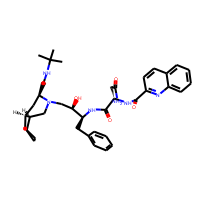
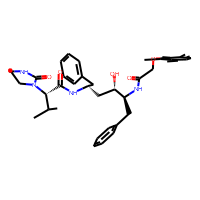
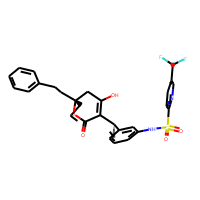
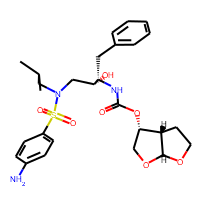
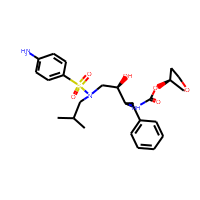
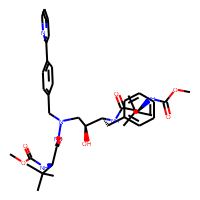
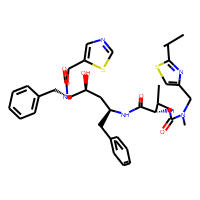

<IPython.core.display.Javascript object>

In [24]:
df_tmp = PandasTools.LoadSDF(protease_sdf)
display(HTML(df_tmp.to_html()))

### Prepare system call

In [13]:
sys_call = (
    path_to_binary
    + " --input "
    + protease_sdf
    + " --searchFiles "
    + str(library)
    + " --maxNofResults "
    + str(max_nof_results)
    + " --outputFiles "
    + str(DATADIR / f"{outfile_name}.sdf")
    + " --minSimilarityThreshold "
    + str(min_sim_thresh)
    + " --targetSimilarity "
    + str(target_sim)
    + " --totalDiversity "
    + str(total_div)
    + " --gen3dOutput "
    + str(gen_3d_output)
)

<IPython.core.display.Javascript object>

In [14]:
print(sys_call)

C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe --input C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\proteaseFDAdrugs_3D.sdf --searchFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\REALspace_2019-12.space --maxNofResults 100 --outputFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\ex2_out.sdf --minSimilarityThreshold 0.8 --targetSimilarity 1 --totalDiversity 0.95 --gen3dOutput 1


<IPython.core.display.Javascript object>

In [15]:
# run
os.system(sys_call)

0

<IPython.core.display.Javascript object>

,result-rank,similarity,query-name,query-smiles,source,similarity-descriptor,similarity-descriptor-smiles,reaction-name,reagent1-name,reagent1-smiles,reagent2-name,reagent2-smiles,ID,ROMol,reagent3-name,reagent3-smiles
0,1,0.890,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,1.000;0.985;0.999;0.830;0.999;0.705;0.705;0.705;0.705;0.748;1.000;0.600;0.600;0.600;0.993;0.283;1.000;1.000;1.000;1.000;1.000;0.0;0.0;0.0;0.0,c1ccccc1;NCC1CNCC1;C1CCCCC1;c1ccccc1;c1ccccc1;S(=O)=O;S(=O)=O;S(=O)=O;S(=O)=O;N;CC;C=O;C=O;C=O;C=O;O;CC;CC;C;C;CC;;;;,s_22,16974570,[R1*]NCC1C2C(N(C(=O)OC(C)(C)C)C1)CCCC2,17513492,[R1*]C(=O)C(NS(=O)(=O)c1cc2c(cc1)cccc2)Cc3ccccc3,s_22____16974570____17513492,,NaN,NaN
1,2,0.888,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,1.000;0.756;0.0;0.830;0.999;1.000;1.000;0.968;1.000;1.000;1.000;0.756;0.0;0.756;0.993;0.283;1.000;1.000;1.000;1.000;1.000;0.968;0.0;0.0;0.0,c1ccccc1;N1CCCCC1;;c1ccccc1;c1ccccc1;C=O;N;CC;C=O;N;CC;N1CCCCC1;;N1CCCCC1;O=C;O;CC;CC;C;C;CC;CC;;;,s_22,15099094,[R1*]NCC(c1ccccc1)C2CCN(C(=O)OC(C)(C)C)CC2,517540,[R1*]C(=O)CCNC(=O)c1cc2c(cc1)cccc2,s_22____15099094____517540,,NaN,NaN
2,3,0.888,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,0.862;0.914;0.0;0.997;1.000;0.852;0.952;0.952;0.995;1.000;0.862;0.676;0.676;1.000;0.993;0.283;1.000;1.000;1.000;1.000;0.862;0.0;0.0;0.0;0.0,c1ccccc1;N1CC[NH+]CC1;;c1cccnc1;c1ccccc1;C(=O)N;NC;NC;C=O;N;c1ccccc1;CO;CO;C;O=C;O;CC;CC;C;C;c1ccccc1;;;;,s_2430a,10893904,[R1*]C(=O)Nc1c(OCCN2CCN(C(=O)OC(C)(C)C)CC2)cccc1,4711944,[R1*]NCC(=O)Nc1cnc2c(c1)cccc2,s_2430a____10893904____4711944,,NaN,NaN
3,4,0.885,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,1.000;0.951;0.0;0.830;0.999;0.705;0.705;0.705;0.705;0.748;1.000;0.856;0.856;1.000;0.857;1.000;1.000;1.000;1.000;1.000;1.000;0.0;0.0;0.0;0.0,c1ccccc1;C1CC[NH+]CC1;;c1ccccc1;c1ccccc1;S(=O)=O;S(=O)=O;S(=O)=O;S(=O)=O;N;CC;C(=O)N;C(=O)N;C;CC=O;N;C;C;C;C;CC;;;;,s_22,6727166,[R1*]NCC1CCN(CC(=O)NC(C)(C)C)CC1,17513492,[R1*]C(=O)C(NS(=O)(=O)c1cc2c(cc1)cccc2)Cc3ccccc3,s_22____6727166____17513492,,NaN,NaN
4,5,0.883,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,1.000;0.756;0.0;0.909;1.000;0.909;0.820;0.820;0.995;1.000;1.000;0.756;0.0;0.756;0.993;0.283;1.000;1.000;1.000;1.000;1.000;0.949;0.0;0.0;0.0,c1ccccc1;N1CCCCC1;;N1C(ccC=N1)=O;c1ccccc1;N1C(ccC=N1)=O;NCC;NCC;C=O;N;CC;N1CCCCC1;;N1CCCCC1;O=C;O;CC;CC;C;C;CC;C;;;,s_2708,7943950,[R1*]C(=O)NC(CN1N=Cc2c(cccc2)C1=O)C,15099118,[R1*]NCC(c1ccccc1)C2CCN(C(=O)OC(C)(C)C)CC2,s_2708____7943950____15099118,,NaN,NaN
5,6,0.883,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,1.000;0.756;0.0;0.762;1.000;0.993;1.000;1.000;1.000;1.000;1.000;0.756;0.0;0.756;0.993;0.283;1.000;1.000;1.000;1.000;1.000;1.000;1.000;1.000;0.043,c1ccccc1;N1CCCCC1;;OCC1cccc1;c1ccccc1;C=O;N;C;C=O;N;CC;N1CCCCC1;;N1CCCCC1;O=C;O;CC;CC;C;C;CC;C;C=O;N;c1ccccc1,s_22,15099094,[R1*]NCC(c1ccccc1)C2CCN(C(=O)OC(C)(C)C)CC2,12297730,[R1*]C(=O)C(NC(=O)OCC1c2c(c3c1cccc3)cccc2)CC(=O)N,s_22____15099094____12297730,,NaN,NaN
6,7,0.881,,O=C(N[C@H](C(=O)N[C@H]([C@H](O)C[N@@H+]1[C@H](C(=O)NC(C)(C)C)C[C@H]2[C@@H](C1)CCCC2)Cc3ccccc3)CC(=O)N)c4nc5c(cc4)cccc5,REALspace_2019-12,0.0;0.948;0.0;1.000;1.000;0.633;0.633;1.000;1.000;0.895;0.895;0.895;0.0;0.948;0.857;1.000;1.000;1.000;1.000;1.000;0.0;0.999;0.860;1.000;0.0,;C1CC[NH+]CC1;;c1ccccn1;c1ccccc1;N1C=CN=N1;N1C=CN=N1;C;O=C;NC;NC;NC;;C1CC[NH+]CC1;CC=O;N;C;C;C;C;;C;CC=O;N;,m_274860a,17137264,[R3*]NCC1CCN(CC(=O)NC(C)(C)C)CC1,17212890,[R1*]N=NN([R2*])C(C([R3*])=O)CCC(=O)N,m_274860a____1713726
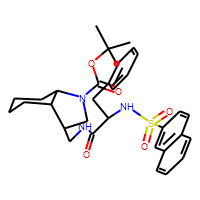
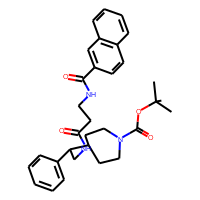
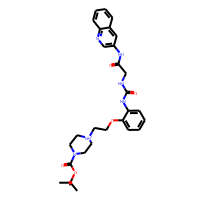
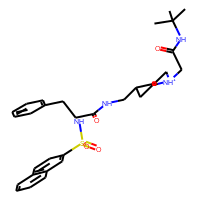
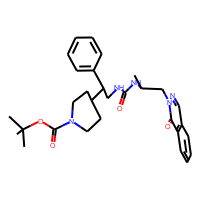
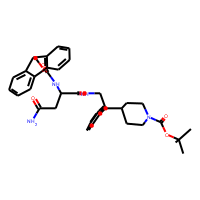
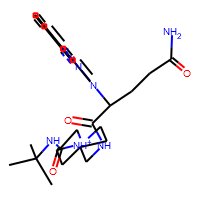
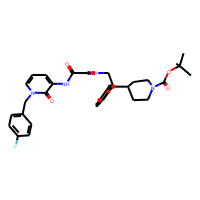
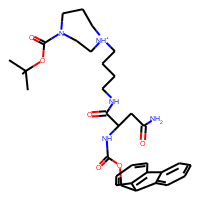
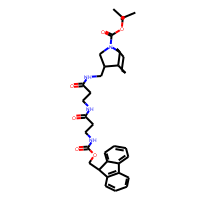
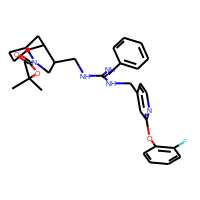
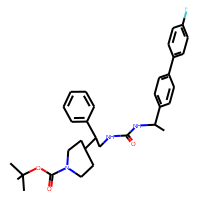
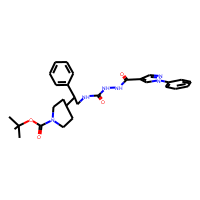
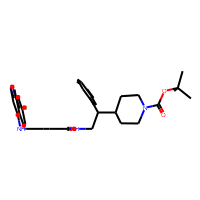
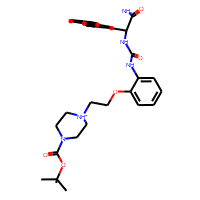
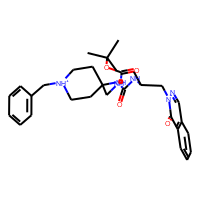
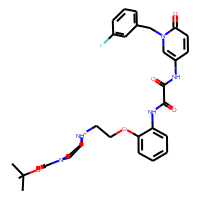
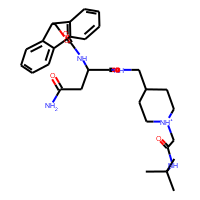
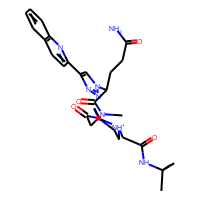
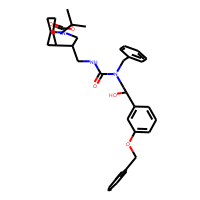
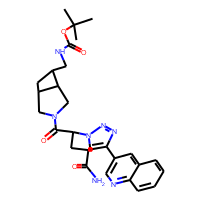
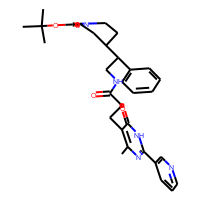
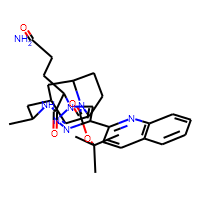
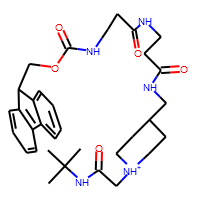
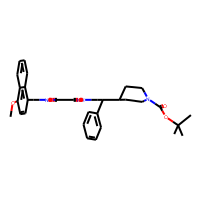
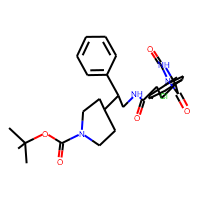
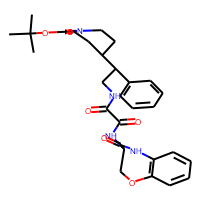
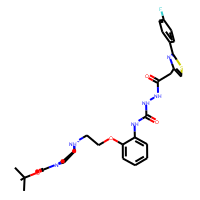
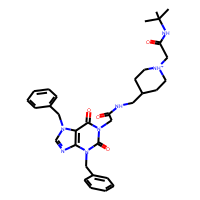
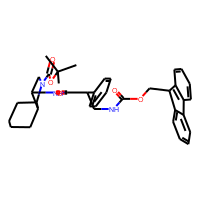
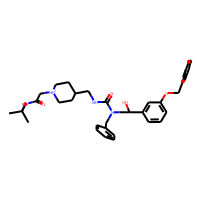
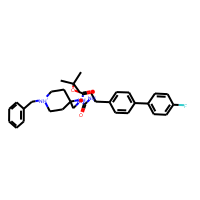
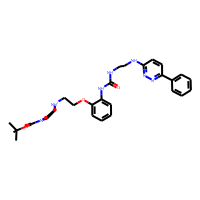
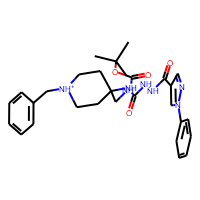
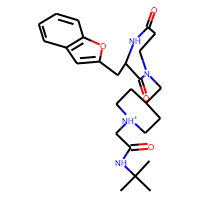
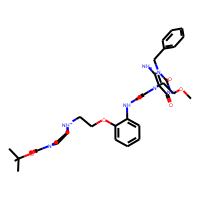
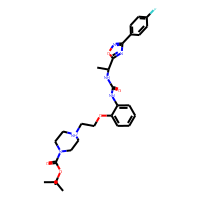
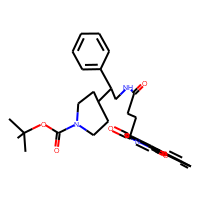
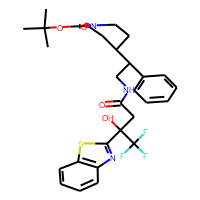
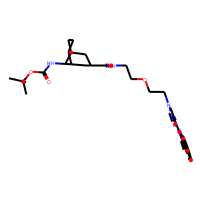
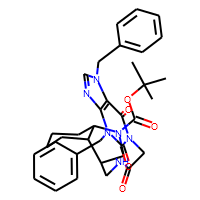
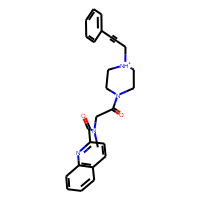
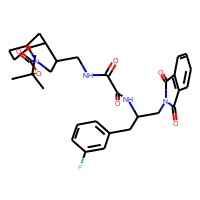
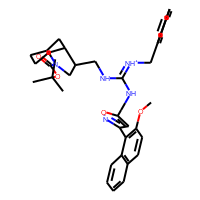
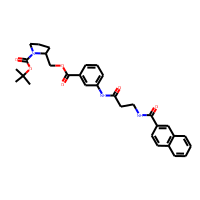
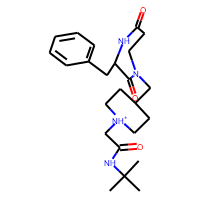
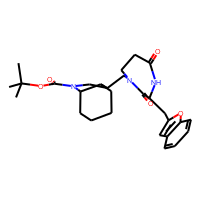
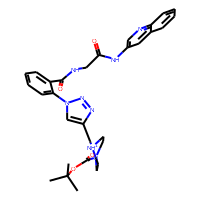
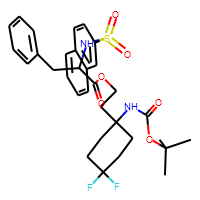
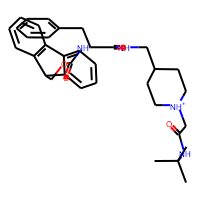
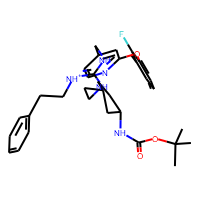
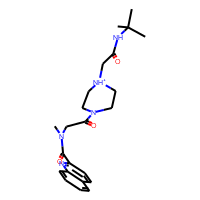
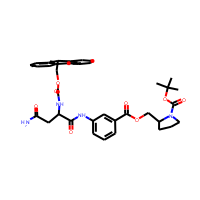
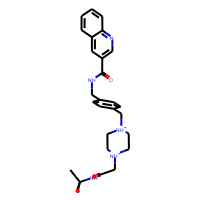
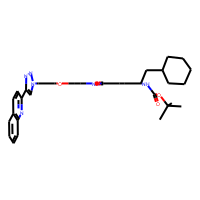
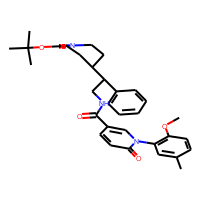
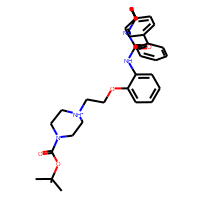
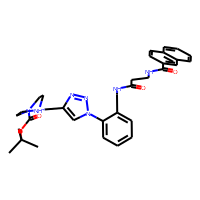
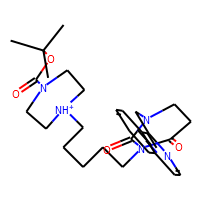
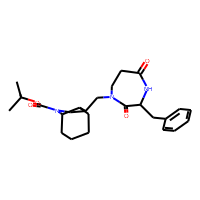
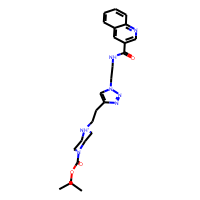
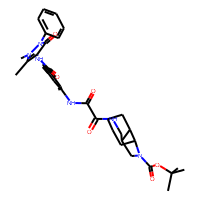
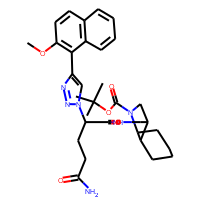
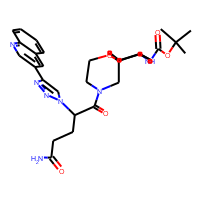
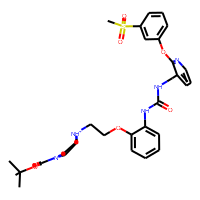
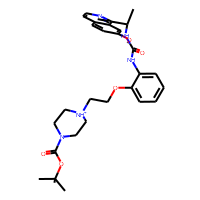
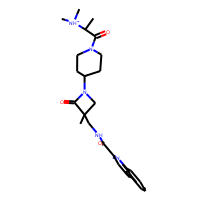
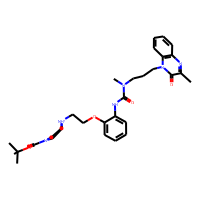
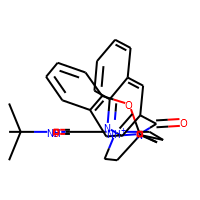
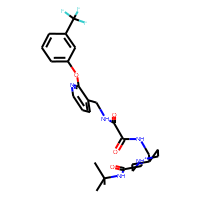
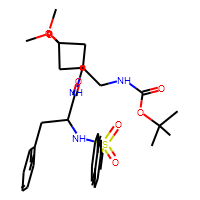
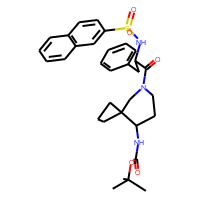
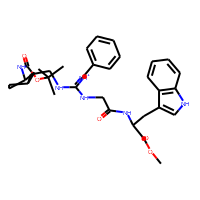
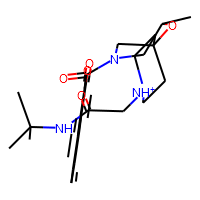
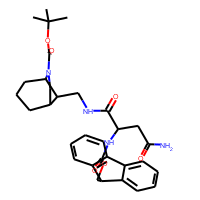
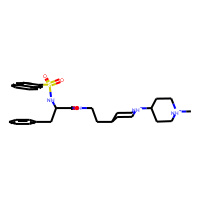
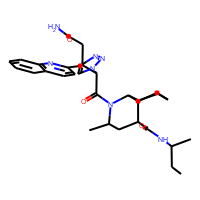
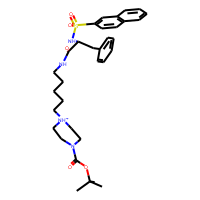
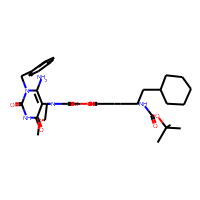
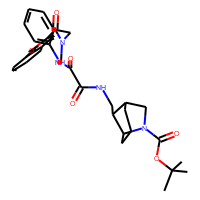
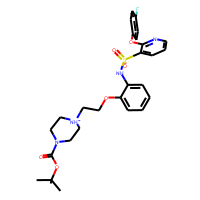
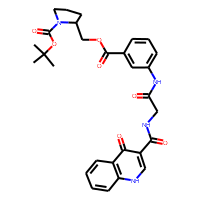
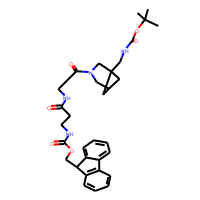
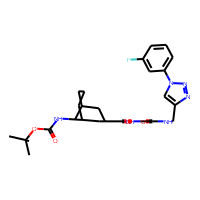
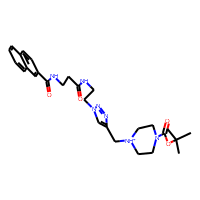
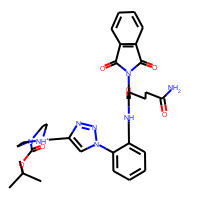
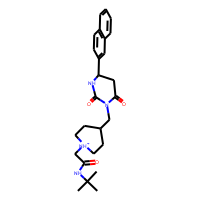
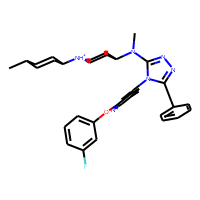
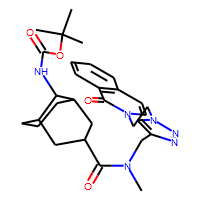
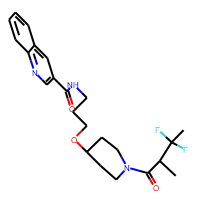
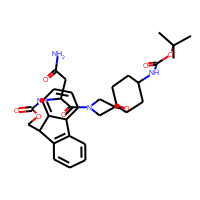
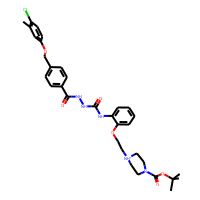
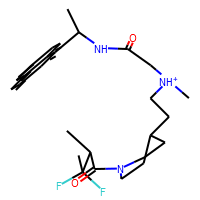
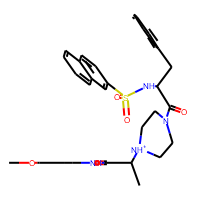
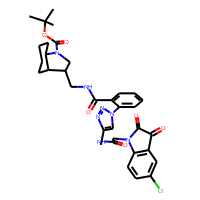
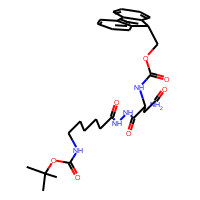
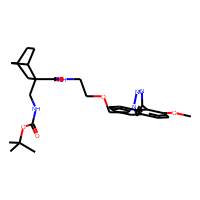
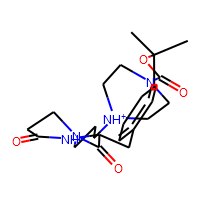
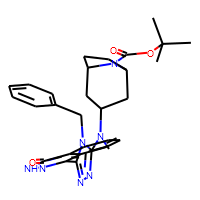
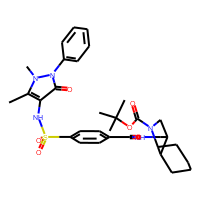

<IPython.core.display.Javascript object>

In [19]:
df2 = PandasTools.LoadSDF(str(DATADIR / f"{outfile_name}_1.sdf"))
display(HTML(df2.to_html()))

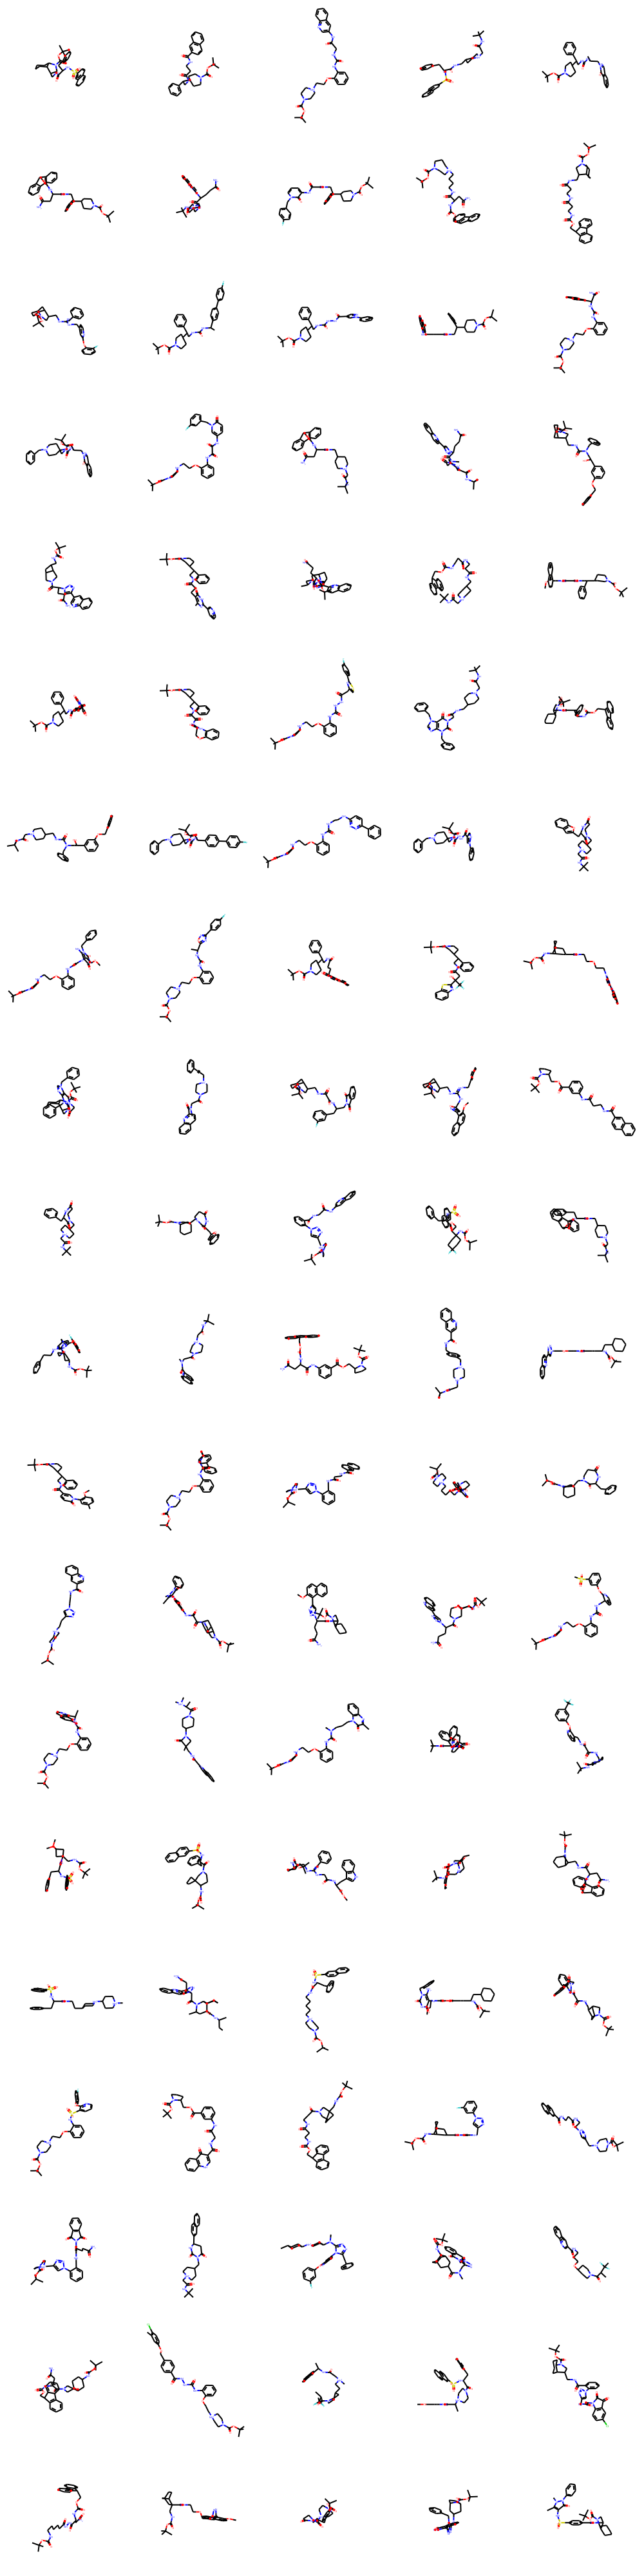

<IPython.core.display.Javascript object>

In [22]:
Draw.MolsToGridImage(df2.ROMol, molsPerRow=5)